### **Tutorial 11: TF-IDF**

This tutorial explains the concept of **Term Frequency-Inverse Document Frequency (TF-IDF)**, a statistical measure used to evaluate the importance of a word in a document relative to a collection or corpus of documents. It is widely used in information retrieval and text mining tasks, such as document classification and clustering, and as a feature for natural language processing (NLP) models.

**TF-IDF** is a product of two components:

1. **Term Frequency (TF)**: This measures how frequently a term appears in a document. It can be calculated as:

   $$
   \text{TF}(t, d) = \frac{\text{Number of times term t appears in document d}}{\text{Total number of terms in document d}}
   $$

2. **Inverse Document Frequency (IDF)**: This measures the importance of the term in the entire corpus. It gives higher weight to terms that appear in fewer documents. It can be calculated as:

   $$
   \text{IDF}(t, D) = \log \frac{|D|}{|\{d \in D: t \in d\}|}
   $$



The **TF-IDF** score is computed by multiplying the **TF** and **IDF** values:

$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$

---
In this tutorial, we will build a TF-IDF model from scratch using Python. We will:
- Create a custom implementation of TF-IDF calculation.
- Implement the vectorization process for a small corpus of text.
- Use this model to calculate the TF-IDF values for terms in each document.
- Verify the results uisng Python built-in scikit-learn TF-IDF-Vectorizer. 

### **Steps:**
 
1. **Calculate Term Frequency (TF)**:
   - For each document, count the frequency of each term.

2. **Calculate Inverse Document Frequency (IDF)**:
   - For each term, calculate how many documents it appears in, and then compute the inverse frequency.

3. **Compute TF-IDF**:
   - Multiply TF and IDF values for each term in each document.



In [1]:
from utils import tfidf_vectorizer as tv
import pandas as pd

tfidf = tv.Tfidf_Vectorizer()

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "yangon is a city with a rich history",
    "bagan is famous for its ancient temples and pagodas",
    "the irrawaddy river is the lifeline of myanmar"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df

,ancient,and,bagan,city,famous,for,history,irrawaddy,is,its,lifeline,myanmar,of,pagodas,rich,river,temples,the,with,yangon
0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1
1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0,2,0,0


In [3]:
# Please note that my method requires the corpus to be tokenized whereas scikit-learn requires the corpus to be a string. Which one is better?
my_corpus = [
    ["yangon", "is", "a", "city", "with", "a", "rich", "history"],
    ["bagan", "is", "famous", "for", "its", "ancient", "temples", "and", "pagodas"],
    ["the", "irrawaddy", "river", "is", "the", "lifeline", "of", "myanmar"],
    ["traditional", "foods", "like", "mohinga", "are", "popular", "in", "myanmar"],
    ["the", "shwedagon", "pagoda", "is", "a", "sacred", "site", "in", "yangon"],
    ["bamboo", "houses", "are", "common", "in", "rural", "areas", "of", "myanmar"],
    ["mandalay", "is", "known", "for", "its", "cultural", "heritage"],
    ["inle", "lake", "is", "famous", "for", "floating", "gardens", "and", "leg", "rowers"],
    ["kuthodaw", "pagoda", "is", "home", "to", "the", "world's", "largest", "book"],
    ["the", "thanaka", "paste", "is", "used", "as", "a", "traditional", "cosmetic", "in", "myanmar"]
]

tfidf_matrix = tfidf.fit_transform(my_corpus)
df_tfidf = pd.DataFrame(tfidf_matrix)
df_tfidf = df_tfidf.fillna(0)
df_tfidf


,yangon,is,a,city,with,rich,history,bagan,famous,for,...,home,to,world's,largest,book,thanaka,paste,used,as,cosmetic
0,0.287410,0.150084,0.502900,0.338094,0.338094,0.338094,0.338094,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.133408,0.000000,0.000000,0.000000,0.000000,0.000000,0.300528,0.255476,0.223511,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.150084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.255476,0.133408,0.223511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.171524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.120067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.229928,0.201160,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.133408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.300528,0.300528,0.300528,0.300528,0.300528,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.109152,0.182873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.245886,0.245886,0.245886,0.245886,0.245886


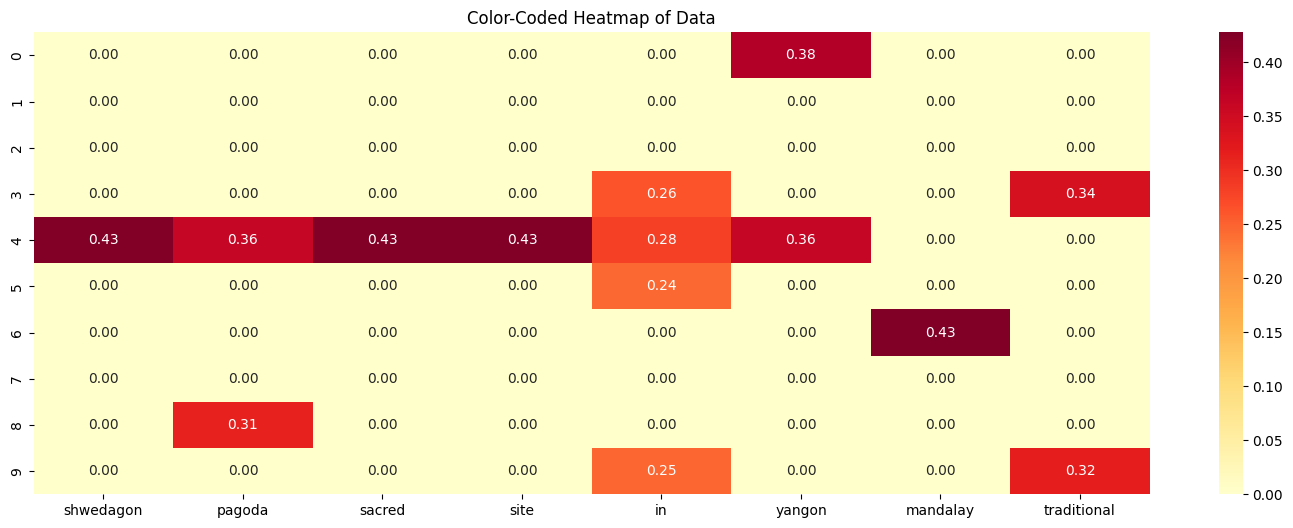

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "yangon is a city with a rich history",
    "bagan is famous for its ancient temples and pagodas",
    "the irrawaddy river is the lifeline of myanmar",
    "traditional foods like mohinga are popular in myanmar",
    "the shwedagon pagoda is a sacred site in yangon",
    "bamboo houses are common in rural areas of myanmar",
    "mandalay is known for its cultural heritage",
    "inle lake is famous for floating gardens and leg rowers",
    "kuthodaw pagoda is home to the world's largest book",
    "the thanaka paste is used as a traditional cosmetic in myanmar"
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
dense = X.todense()

df = pd.DataFrame(dense, columns=vectorizer.get_feature_names_out())
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
sns.heatmap(df.loc[0:10,["shwedagon", "pagoda", "sacred", "site", "in", "yangon", "mandalay", "traditional"]], annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Color-Coded Heatmap of Data")
plt.show()

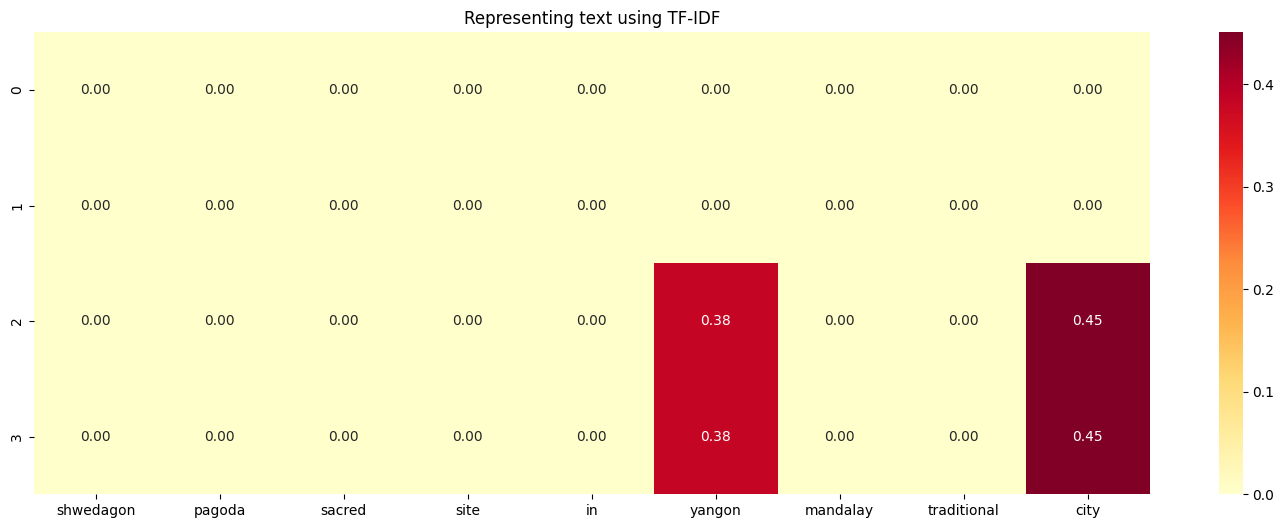

In [5]:
sentences = ["love deep learning",
             "deep learning I love",
             "yangon is a city with a rich history","with a rich history, is a yangon city"]
test = vectorizer.transform(sentences)
df = pd.DataFrame(test.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(18, 6))
sns.heatmap(df.loc[0:10,["shwedagon", "pagoda", "sacred", "site", "in", "yangon", "mandalay", "traditional", "city"]], annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Representing text using TF-IDF")
plt.show()